In [1]:
import pandas as pd

In [3]:
books = pd.read_csv('books.csv')
book_ratings = pd.read_csv('ratings.csv')
book_tags = pd.read_csv('book_tags.csv')

In [5]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [6]:
book_ratings

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4
...,...,...,...
233378,36947,6939,5
233379,22352,617,2
233380,42785,1613,4
233381,10622,610,5


In [7]:
book_tags

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78
...,...,...,...
40195,31845516,13254,7
40196,31845516,19734,7
40197,31845516,833,7
40198,31845516,23471,6


**1**. How many books do not have an original title [books.csv]?

In [10]:
books_without_original_title = books[books["original_title"].isnull()]
print(f"Books without original title: {len(books_without_original_title)}")

Books without original title: 36


**2**. How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [12]:
books_cleaned = books.dropna(subset="original_title")
book_ratings_cleaned = book_ratings[book_ratings['book_id'].isin(books_cleaned['book_id'])]
book_tags_cleaned = book_tags[book_tags['goodreads_book_id'].isin(books_cleaned['goodreads_book_id'])]

In [13]:
unique_books = books_cleaned['book_id'].nunique()
print(f"Unique books: {unique_books}")

Unique books: 363


**3**. How many unique users are present in the dataset [ratings.csv] ?

In [15]:
unique_users = book_ratings_cleaned['user_id'].nunique()
print(f"Unique users: {unique_users}")

Unique users: 40573


**4**. How many unique tags are there in the dataset [book_tags.csv] ?

In [16]:
unique_tags = book_tags_cleaned['tag_id'].nunique()
print(f"Unique tags: {unique_tags}")

Unique tags: 3438


**5**. Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [17]:
most_common_tag = book_tags_cleaned['tag_id'].value_counts().idxmax()
print(f"Most frequently used tag: {most_common_tag}")

Most frequently used tag: 4600


**6**. Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

In [19]:
books_with_tags = pd.merge(book_tags_cleaned, books_cleaned, how="inner", on="goodreads_book_id")
book_with_most_tags = books_with_tags['title'].value_counts().idxmax()
print(f"Book with most number of tags: {book_with_most_tags}")

Book with most number of tags: Another Bullshit Night in Suck City


**7**. Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

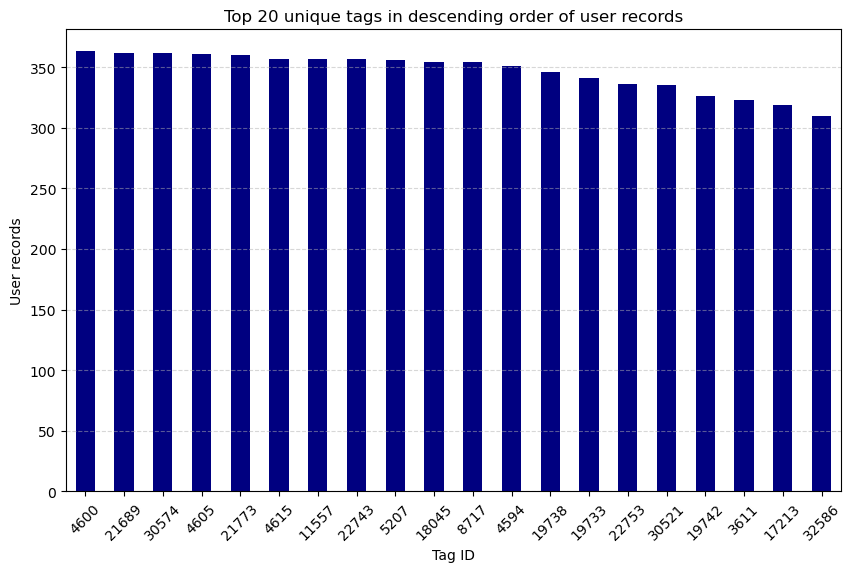

In [36]:
import matplotlib.pyplot as plt

top_tags = book_tags_cleaned.groupby('tag_id').size().nlargest(20).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_tags.plot(kind="bar", color="navy")
plt.title("Top 20 unique tags in descending order of user records")
plt.xlabel("Tag ID")
plt.ylabel("User records")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()